<a href="https://colab.research.google.com/github/HarshXtech/deep-learning-concepts/blob/main/customer_churn_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('sample_data/Churn_Modelling.csv')

In [ ]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Check for Duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True, dtype=int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Exited', axis='columns')
y = df['Exited']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
4072,810,38,9,153166.17,1,1,1,93261.69,0,0,0
7802,773,63,9,111179.83,1,1,1,93091.02,1,0,1
2240,785,33,6,127211.45,1,0,0,191961.83,0,1,0
3044,649,29,2,45022.23,1,1,1,173495.77,1,0,1
76,664,55,8,0.00,2,1,1,139161.64,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6035,617,34,1,61687.33,2,1,0,105965.25,1,0,0
9571,739,41,8,0.00,1,1,0,191694.77,0,0,1
3816,664,31,9,114519.57,2,0,1,79222.02,0,0,0
4745,768,49,1,133384.66,1,1,0,102397.22,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[ 1.65175982, -0.10006831,  1.38779832, ..., -1.08930662,
        -0.58001892, -0.57755555],
       [ 1.26784648,  2.27737816,  1.38779832, ...,  0.91801516,
        -0.58001892,  1.73143519],
       [ 1.39235892, -0.5755576 ,  0.34743508, ..., -1.08930662,
         1.72408168, -0.57755555],
       ...,
       [ 0.13685853, -0.76575332,  1.38779832, ..., -1.08930662,
        -0.58001892, -0.57755555],
       [ 1.2159663 ,  0.94600814, -1.38650364, ...,  0.91801516,
         1.72408168, -0.57755555],
       [-0.52720778,  0.18522527, -1.38650364, ..., -1.08930662,
        -0.58001892, -0.57755555]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(7, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 264 (1.03 KB)

 Trainable params: 264 (1.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8661 - loss: 0.3276 - val_accuracy: 0.8560 - val_loss: 0.3575
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3177 - val_accuracy: 0.8560 - val_loss: 0.3518
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3165 - val_accuracy: 0.8573 - val_loss: 0.3533
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3356 - val_accuracy: 0.8533 - val_loss: 0.3537
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8643 - loss: 0.3258 - val_accuracy: 0.8567 - val_loss: 0.3510
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8645 - loss: 0.3300 - val_accuracy: 0.8533 - val_loss: 0.3510
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.3235 - val_accuracy: 0.8540 - val_loss: 0.3509
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8625 - loss: 0.3321 - val_accu

In [ ]:
model.layers[1].get_weights()

[array([[ 3.0228920e-02, -4.0427589e-01,  3.5439236e-03, -8.1685710e-01,
          5.9671289e-01, -9.0966173e-02, -1.7568517e-01, -3.8711426e-01,
          1.9637278e-01,  2.3182982e-01,  9.5097134e-03],
        [-5.8018905e-01,  6.8609732e-01,  1.7112124e-01, -7.1504903e-01,
          5.1563255e-02, -8.3677610e-04,  5.7987064e-01,  2.9866907e-01,
          8.2708336e-02, -4.7847752e-02, -1.2814948e-01],
        [-7.0360458e-01,  1.5750487e-01, -3.6482757e-01, -2.2050665e-01,
          4.7499114e-01, -3.5757363e-01, -2.8083619e-01, -2.8273478e-01,
          9.1109656e-02, -3.4927908e-01,  1.2068826e+00],
        [-4.7862288e-01, -1.0787922e-01, -4.4055262e-01,  5.3538263e-01,
          7.8709704e-01, -2.6108456e-01,  4.7889897e-01, -2.5372639e-01,
         -2.9931468e-01,  1.4319108e-01,  1.5341884e-02],
        [ 5.0785929e-01,  2.0208849e-01,  6.3009012e-01,  4.0560579e-01,
         -3.9115304e-01, -5.5012137e-01,  5.0126627e-02, -3.1763461e-01,
         -3.0504078e-01, -2.8362533e-0

In [ ]:
y_prob = model.predict(x_test_scaled)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
import numpy as np

y_pred = np.where(y_prob > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.8588

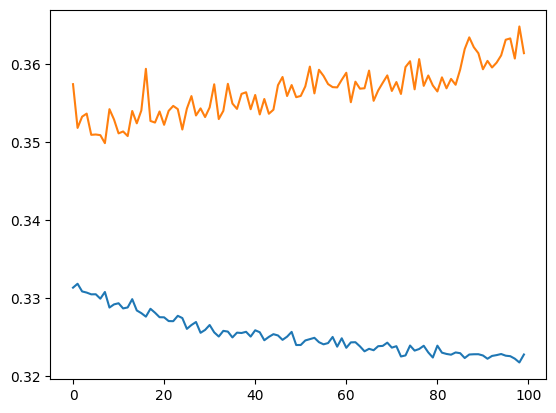

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

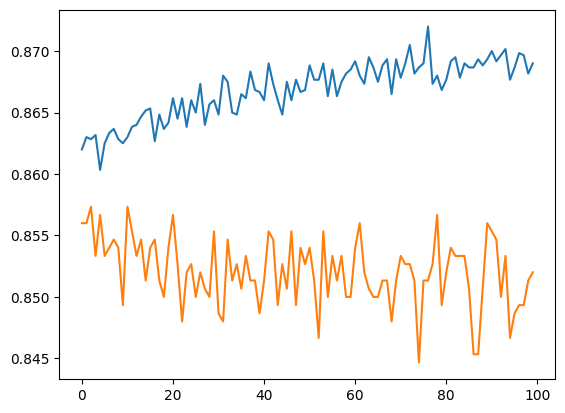

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])